# Assignment 0: PyTorch Tutorial

Based on the tutorials by Sandeep Subramanian, Chin-Wei Huang, and Krishna Murthy for IFT6135 in 2018, 2019, 2020, and 2021

**Best reference when coding is the PyTorch official documentation:** https://pytorch.org/docs/stable/index.html

# 1. The torch tensor library

**A numpy equivalent with GPU and automatic differentiation support**

In [ ]:
import torch
import numpy as np

In [ ]:
print(torch.__version__)
print(torch.cuda.is_available())

1.12.1+cu113
False


### Tensors and important attributes

The central data structure in PyTorch is a `Tensor` -- an n-dimensional array.

In [ ]:
# Create a 2-dimensional tensor (i.e., a matrix) of shape (5, 3)
torch.Tensor(5, 3)

tensor([[2.6440e-35, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28],
        [3.8016e-39, 0.0000e+00, 0.0000e+00]])

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
#print(f"req: {tensor.requires_grad}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Tensors can be initialized in multiple ways:
* Constant values (zeros, ones, etc.)
* Randomly-sampled values
* Special tensor types (identity matrices, diagonal matrices, etc.)
* Read values from python lists or numpy arrays

In [ ]:
# Tensor of shape (5, 3) with all values set to 0
print(torch.Tensor(5, 3).zero_())
# Tensor of shape (5, 3) with all values set to 1
print(torch.Tensor(5, 3).fill_(5.3))
# Tensor of shape (5, 3) with values sampled from a uniform dist in [-1, 1]
print(torch.Tensor(5, 3).uniform_(-10, 100))
# Tensor of shape (5, 3) with values sampled from a uniform dist in [0, 1]
print(torch.rand(5, 3) * 2 + 1)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[5.3000, 5.3000, 5.3000],
        [5.3000, 5.3000, 5.3000],
        [5.3000, 5.3000, 5.3000],
        [5.3000, 5.3000, 5.3000],
        [5.3000, 5.3000, 5.3000]])
tensor([[25.5184, -4.2713, 31.4728],
        [99.0537, 89.9023, 54.9988],
        [10.3225, 56.3923, 48.6635],
        [88.0066, -8.6128, 54.0045],
        [29.0937, 44.5896, 39.2668]])
tensor([[1.8512, 2.9995, 2.8301],
        [2.3681, 1.8270, 1.8131],
        [2.6182, 2.1221, 2.2987],
        [2.9084, 2.0783, 1.5197],
        [1.9841, 2.2063, 1.2057]])


**Tensor Types**

More details: http://pytorch.org/docs/stable/tensors.html

| Data type | `dtype` | CPU tensor class | GPU tensor class |
|-----------|---------|------------|------------|
| 32-bit floating point | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` | `torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 16-bit floating point | `torch.bfloat16` | `torch.BFloat16Tensor` | `torch.cuda.BFloat16Tensor` |
| 32-bit complex | `torch.complex32` | | |
| 64-bit complex | `torch.complex64` | | |
| 128-bit complex | `torch.complex128` or `torch.cdouble` | | |
| 8-bit integer (unsigned) | `torch.uint8` | `torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer (signed) | `torch.int8` | `torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer (signed) | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer (signed) | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer (signed) | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor` |
| Boolean | `torch.bool` | `torch.BoolTensor` | `torch.cuda.BoolTensor` |

Create tensor from python lists and numpy arrays

In [ ]:
# Create a tensor from list
z = torch.LongTensor([[[1], [3]], [[2], [9]]])  # the type's constructor
print(z.type(), z.dtype)
z = torch.tensor([[1, 3], [2, 9]])  # tensor construction function
print(z.type(), z.dtype)

tensor([[[1],
         [3]],

        [[2],
         [9]]])
torch.LongTensor torch.int64
torch.LongTensor torch.int64


`torch.tensor()` and `torch.Tensor()` are different!
See [this link](https://stackoverflow.com/questions/51911749/what-is-the-difference-between-torch-tensor-and-torch-tensor) for an explanation.

In [ ]:
# torch.tensor() is a function that returns a torch.Tensor object
z = torch.tensor([[1, 3], [2, 9]])
print(z.dtype)
# torch.Tensor is a constructor for the Tensor class
z = torch.Tensor([[1, 3], [2, 9]])  # torch.Tensor = torch.FloatTensor
print(z.dtype)
z = torch.FloatTensor([[1, 3], [2, 9]])
print(z.dtype)

z = torch.Tensor([1, 3])
print(z)
z = torch.Tensor(1, 3) # torch.Tensor = torch.empty
print(z)
z = torch.empty(1, 3)
print(z)

torch.int64
torch.float32
torch.float32
tensor([1., 3.])
tensor([[1.2389e+25, 3.0719e-41, 2.0000e+00]])
tensor([[1.2389e+25, 3.0719e-41, 2.0000e+00]])


For a more comprehensive and up-to-date list of tensor attributes, visit [this link](https://pytorch.org/docs/stable/tensor_attributes.html).

### Operations involving tensors

In [ ]:
x = torch.Tensor(5, 3).uniform_(-1, 1)
power = torch.randn(5, 3)
y = torch.abs(x) ** power
print(y)

tensor([[ 0.3126,  0.9435,  0.7390],
        [22.3277,  0.2720,  2.6502],
        [ 0.2683,  0.2311,  1.4754],
        [ 2.6759,  0.0661,  0.7967],
        [ 5.1303,  1.0302,  0.6245]])


Multiplying tensors

In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[0.3482, 0.2878, 0.1201, 0.5882],
        [0.9049, 0.0045, 0.0446, 0.1509],
        [0.2215, 0.1152, 0.2363, 0.0855]]) 

tensor * tensor 
 tensor([[0.3482, 0.2878, 0.1201, 0.5882],
        [0.9049, 0.0045, 0.0446, 0.1509],
        [0.2215, 0.1152, 0.2363, 0.0855]])


In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[1.3442, 0.9682, 0.8525],
        [0.9682, 1.1048, 0.6866],
        [0.8525, 0.6866, 0.6585]]) 

tensor @ tensor.T 
 tensor([[1.3442, 0.9682, 0.8525],
        [0.9682, 1.1048, 0.6866],
        [0.8525, 0.6866, 0.6585]])


# 2. PyTorch autograd



The torch autograd package provides automatic differentiation for all operations on Tensors. PyTorch's autograd is a reverse mode automatic differentiation system. Backprop is defined by how your code is run, and that every single iteration can be different.


Conceptually, autograd maintains a graph that records all of the operations performed on variables as you execute your operations. This results in a directed acyclic graph whose leaves are the input variables and roots are the output variables. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule. Let's see this graph in a tiny example.

In [ ]:
!pip install torchviz

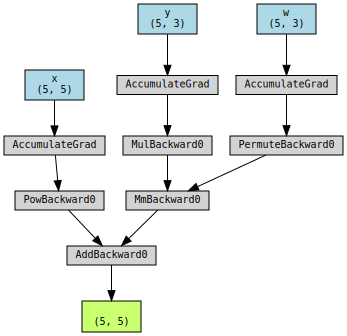

In [ ]:
from torchviz import make_dot

x = torch.Tensor(5, 5).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
w = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
z = x ** 2 + 3 * y @ w.T

dict_param = {'x': x, 'y': y, 'w': w}
make_dot(z, params=dict_param)

Internally, autograd represents this graph as a graph of Function objects (really expressions), which can be `apply()` ed to compute the result of evaluating the graph. When computing the forward pass, autograd simultaneously performs the requested computations and builds up a graph representing the function that computes the gradient (the `.grad_fn` attribute of each Variable is an entry point into this graph). When the forward pass is completed, we evaluate this graph in the backwards pass to compute the gradients.

In [ ]:
x = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(3, 5).uniform_(-1, 1)
z = torch.mm(x, y)
print(z.shape)
print(z.grad_fn)

torch.Size([5, 5])


Computing gradients will be done with `backward()` & `torch.autograd.grad` please note that calling `.backward()` multiple times will accumulate gradients into `.grad` and NOT overwrite them.

In [ ]:
x = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
z = x ** 2 + 3 * y
z.backward(gradient=torch.ones(5, 3))
print(x.grad)

x.grad = None
y.grad = None
z = x ** 2 + 3 * y
o = z.sum()
o.backward()
# print(x.grad)

tensor([[ 1.6571,  0.1368, -1.4344],
        [ 1.2790, -1.6114, -0.4352],
        [ 0.2974, -1.0119, -0.4069],
        [ 0.9086,  0.6902, -0.2721],
        [-0.5419, -0.4431,  0.8269]])
tensor([[ 1.6571,  0.1368, -1.4344],
        [ 1.2790, -1.6114, -0.4352],
        [ 0.2974, -1.0119, -0.4069],
        [ 0.9086,  0.6902, -0.2721],
        [-0.5419, -0.4431,  0.8269]])


In [ ]:
x = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
z = x ** 2 + 3 * y
dz_dx = torch.autograd.grad(z, x, grad_outputs=torch.ones(5, 3))
dz_dy = torch.autograd.grad(z, y, grad_outputs=torch.ones(5, 3))
print(dz_dy)

(tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]),)


# 3. `torch.nn`: The Neural Network module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim

Neural networks can be constructed using the `torch.nn` package.

Provides building blocks for neural networks, such as:

1. Linear layers - `nn.Linear`, `nn.Bilinear`
2. Convolution Layers - `nn.Conv1d`, `nn.Conv2d`, `nn.Conv3d`, `nn.ConvTranspose2d`
3. Nonlinearities - `nn.Sigmoid`, `nn.Tanh`, `nn.ReLU`, `nn.LeakyReLU`
4. Pooling Layers - `nn.MaxPool1d`, `nn.AveragePool2d`
4. Recurrent Networks - `nn.LSTM`, `nn.GRU`
5. Normalization - `nn.BatchNorm2d`
6. Dropout - `nn.Dropout`, `nn.Dropout2d`
7. Embedding - `nn.Embedding`
8. Loss Functions - `nn.MSELoss`, `nn.CrossEntropyLoss`, `nn.NLLLoss`

and more! See [`torch.nn` docs](https://pytorch.org/docs/stable/nn.html) for details.

Instances of these classes will have an `__call__` function built-in that can be used to run an input through the layer.

**Linear, Bilinear, and Nonlinearities**

In [ ]:
x = torch.randn(32, 10)
y = torch.randn(32, 30)

sigmoid = nn.Sigmoid()
#torch.sigmoid
# print(sigmoid(x) == torch.sigmoid(x))

# z = x * W^T + b
linear = nn.Linear(in_features=10, out_features=20, bias=True)
output_linear = linear(x)  # equiv: linear.forward(x)
print('Linear output size : ', output_linear.size())

# z = y^T * W * x + b
bilinear = nn.Bilinear(in1_features=10, in2_features=30, out_features=50, bias=True)
output_bilinear = bilinear(x, y)
print('Bilinear output size : ', output_bilinear.size())

Linear output size :  torch.Size([32, 20])
Bilinear output size :  torch.Size([32, 50])


**Convolution, BatchNorm, and Pooling**

In [ ]:
x = torch.randn(10, 3, 28, 28)  # NCHW

conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, bias=True)
# #bn = nn.BatchNorm2d(num_features=32)
pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

output_conv = conv(x)
outpout_pool = pool(conv(x))

print('Conv output size : ', output_conv.size())
print('Pool output size : ', outpout_pool.size())

Conv output size :  torch.Size([10, 32, 28, 28])
Pool output size :  torch.Size([10, 32, 14, 14])


Let's measure time

In [ ]:
import time
import matplotlib.pyplot as plt

def measure_executation_time(tensor, module, device=torch.device('cpu')):
    tensor = tensor.to(device)
    module = module.to(device)
    times = []
    for i in range(100):
        start = time.time()
        y = module(tensor)
        end = time.time()
        times.append(end-start)
    return np.mean(times)


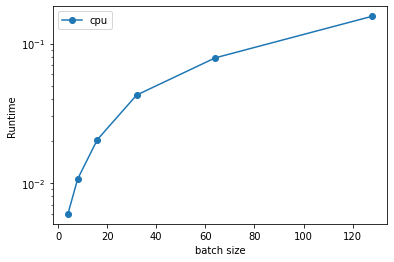

In [ ]:
batch_size = [4, 8, 16, 32, 64, 128]
conv = torch.nn.Conv2d(32, 128, 3)

gpu_time = []
cpu_time = []
for b in batch_size:
    x = torch.rand(b, 32, 32, 32)
    gpu_time.append(measure_executation_time(x, conv, torch.device('cuda')))
    cpu_time.append(measure_executation_time(x, conv, torch.device('cpu')))

plt.plot(batch_size, cpu_time, '-o', label='cpu')
plt.plot(batch_size, gpu_time, '-o', label='gpu')
plt.yscale('log')
plt.xlabel("batch size")
plt.ylabel("Runtime")
plt.legend()

# 4. Image classification on CIFAR10

In [ ]:
import random
from collections import OrderedDict, defaultdict

import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch.optim import *
from torch.optim.lr_scheduler import *
from torch.utils.data import DataLoader
from torchvision.datasets import *
from torchvision.transforms import *
from tqdm.auto import tqdm

### Data
In this tutorial, we will use CIFAR-10 as our target dataset. This dataset contains images from 10 classes, where each image is of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

In [ ]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
train_transform = transforms.Compose([
                  transforms.RandomHorizontalFlip(),
                  transforms.RandomCrop(32, padding=4),
                  transforms.ToTensor(),
                  transforms.Normalize(mean, std)
              ])
test_transform = transforms.Compose([
                  transforms.ToTensor(),
                  transforms.Normalize(mean, std)
              ])
train_data = CIFAR10(root="data/cifar10", train=True, download=True, 
                     transform=train_transform)
test_data = CIFAR10(root="data/cifar10", train=False, download=True, 
                     transform=test_transform)        

train_loader = DataLoader(train_data, batch_size=512, shuffle=True, 
                          num_workers=0, pin_memory=True,)
test_loader = DataLoader(test_data, batch_size=512, shuffle=False, 
                          num_workers=0, pin_memory=True,)

Files already downloaded and verified
Files already downloaded and verified


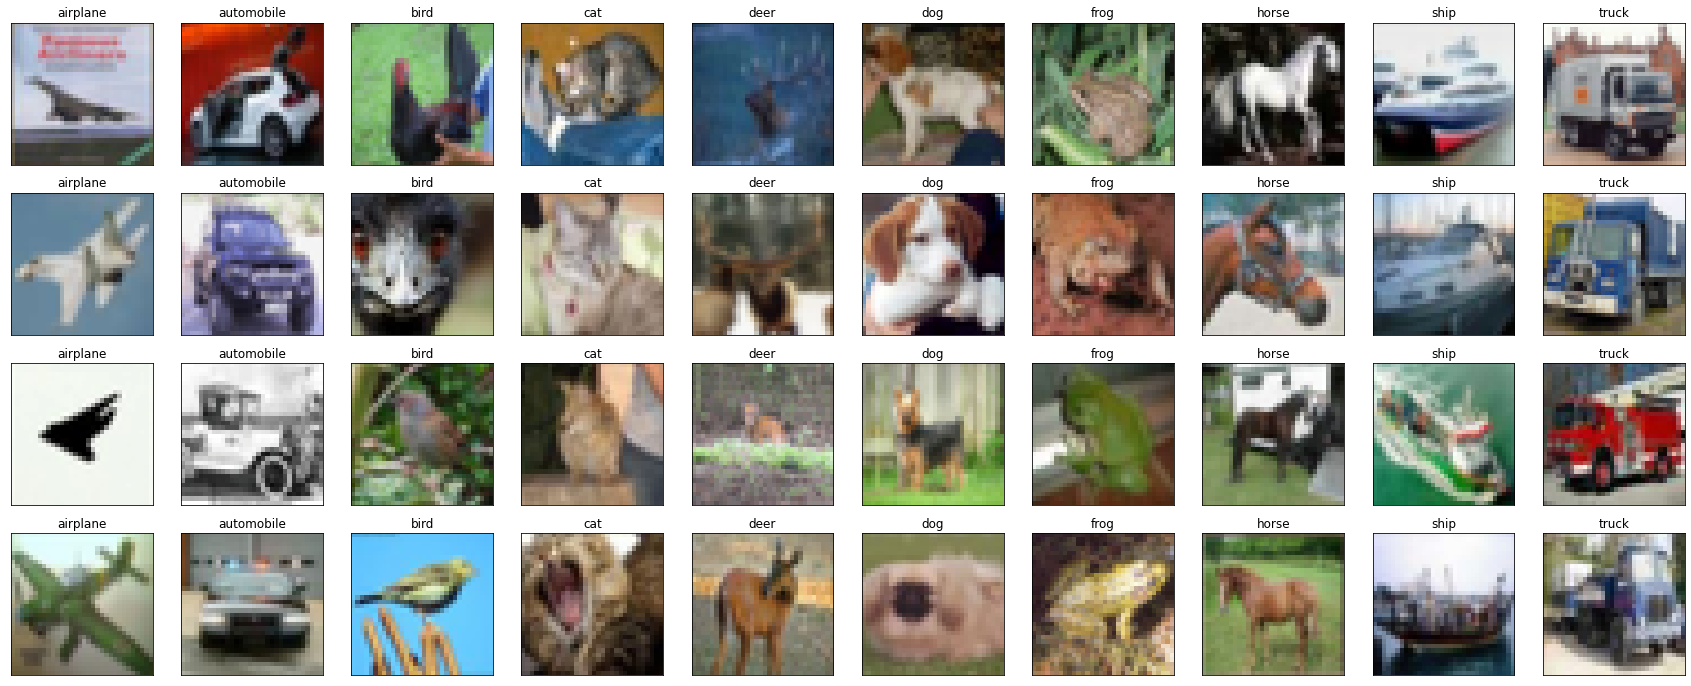

In [ ]:
import torchvision.transforms.functional as F
def show_samples(test_data):
    samples = [[] for _ in range(10)]
    for image, label in test_data:
      if len(samples[label]) < 4:
        samples[label].append(image)
    
    #fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    fig, axes = plt.subplots(4, 10, squeeze=False, figsize=(10*3, 4*3)) 
    for i in range(10):
        for j in range(4):
            img = samples[i][j].detach()
            # unnormalize for visualization
            for c in range(img.shape[0]):
                img[c] = img[c]*std[c] + mean[c]
            img = F.to_pil_image(img)

            axes[j, i].imshow(np.asarray(img))
            axes[j, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
            axes[j, i].set_title(test_data.classes[i])

show_samples(test_data)   

### Model
In this tutorial, we will use a variant of [VGG-11](https://arxiv.org/abs/1409.1556) (with fewer downsamples and a smaller classifier) as our model.

In [ ]:
class VGG(nn.Module):
  ARCH = [64, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

  def __init__(self) -> None:
    super().__init__()

    layers = []
    counts = defaultdict(int)

    def add(name: str, layer: nn.Module) -> None:
      layers.append((f"{name}{counts[name]}", layer))
      counts[name] += 1

    in_channels = 3
    for x in self.ARCH:
      if x != 'M':
        # conv-bn-relu
        add("conv", nn.Conv2d(in_channels, x, 3, padding=1, bias=False))
        add("bn", nn.BatchNorm2d(x))
        add("relu", nn.ReLU(True))
        in_channels = x
      else:
        # maxpool
        add("pool", nn.MaxPool2d(2))

    self.backbone = nn.Sequential(OrderedDict(layers))
    self.classifier = nn.Linear(512, 10)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # backbone: [N, 3, 32, 32] => [N, 512, 2, 2]
    x = self.backbone(x)

    # avgpool: [N, 512, 2, 2] => [N, 512]
    x = x.mean([2, 3])

    # classifier: [N, 512] => [N, 10]
    x = self.classifier(x)
    return x
  
model = VGG().cuda()
print(model.backbone)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = SGD( model.parameters(), lr=0.4, momentum=0.9, weight_decay=5e-4)


In [ ]:
num_epochs = 20
steps_per_epoch = len(train_loader)

# Define the piecewise linear scheduler
lr_lambda = lambda step: np.interp(
  [step / steps_per_epoch],
  [0, num_epochs * 0.3, num_epochs],
  [0, 1, 0]
)[0]

# Visualize the learning rate schedule
steps = np.arange(steps_per_epoch * num_epochs)
plt.plot(steps, [lr_lambda(step) * 0.4 for step in steps])
plt.xlabel("Number of Steps")
plt.ylabel("Learning Rate")
plt.grid("on")
plt.show()

scheduler = LambdaLR(optimizer, lr_lambda)

### Training

In [ ]:
def train(
  model: nn.Module,
  dataflow: DataLoader,
  criterion: nn.Module,
  optimizer: Optimizer,
  scheduler: LambdaLR,
) -> None:
  model.train()

  for inputs, targets in tqdm(dataflow, desc='train', leave=False):
    # Move the data from CPU to GPU
    inputs = inputs.cuda()
    targets = targets.cuda()

    # Reset the gradients (from the last iteration)
    optimizer.zero_grad()

    # Forward inference
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward propagation
    loss.backward()

    # Update optimizer and LR scheduler
    optimizer.step()
    scheduler.step()

@torch.inference_mode()
def evaluate(
  model: nn.Module,
  dataflow: DataLoader
) -> float:
  model.eval()

  num_samples = 0
  num_correct = 0

  for inputs, targets in tqdm(dataflow, desc="eval", leave=False):
    # Move the data from CPU to GPU
    inputs = inputs.cuda()
    targets = targets.cuda()

    # Inference
    outputs = model(inputs)

    # Convert logits to class indices
    outputs = outputs.argmax(dim=1)

    # Update metrics
    num_samples += targets.size(0)
    num_correct += (outputs == targets).sum()

  return (num_correct / num_samples * 100).item()


def fit(model: nn.Module, train_loader: DataLoader, test_loader: DataLoader, 
        criterion: nn.Module, optimizer: Optimizer, scheduler: LambdaLR) -> None:
    test_accuracy = []
    train_accuracy = []
    for epoch_num in tqdm(range(1, num_epochs + 1)):
        train(model, train_loader, criterion, optimizer, scheduler)
        metric = evaluate(model, train_loader)
        train_accuracy.append(metric)
        metric = evaluate(model, test_loader)
        test_accuracy.append(metric)
        print(f"epoch {epoch_num}: train_accuracy={train_accuracy[-1]}, test_accuracy={test_accuracy[-1]}")

    return train_accuracy, test_accuracy

In [ ]:
epoch = np.arange(len(train_accuracy))
plt.figure(figsize=(8,6))
plt.plot(epoch, train_accuracy, label='Train')
plt.plot(epoch, test_accuracy, label='Test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("vgg11")
plt.grid()

### Model summery

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

from collections import OrderedDict, defaultdict
import numpy as np


def summary(model, input_size, batch_size=-1, device=torch.device('cpu'), dtype=torch.float32):
    
    bit_count_dict = {torch.int8:8, torch.uint8:8, 
                  torch.int16:16, torch.float16:16, torch.bfloat16:16, torch.half:16, torch.short:16,
                  torch.float32:32, torch.int32:32, torch.complex32:32,
                  torch.int64:64, torch.float64:64, torch.double:64, torch.complex64:64}
    
    def register_hook(module):
        def hook(module, input, output):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)
            m_key = '{}_{}'.format(class_name, module_idx + 1)
            
            activation_bitwidth = bit_count_dict[x[0].dtype]
            summary[m_key] = {}
            summary[m_key]["activation_size"] = input[0].numel() * activation_bitwidth
      
            weight_size = 0
            bias_size = 0
            weight_bitwidth = 0
            bias_bitwidth = 0
            if hasattr(module, "weight"):
                weight_size = module.weight.numel()
                weight_bitwidth = bit_count_dict[module.weight.dtype]
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                bias_size = module.bias.numel()
                bias_bitwidth = bit_count_dict[module.bias.dtype]
            summary[m_key]["params"] = weight_size * weight_bitwidth + bias_size * bias_bitwidth

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
        ):
            hooks.append(module.register_forward_hook(hook))


    if batch_size > 0:
         x = torch.rand(batch_size, *input_size).type(dtype).to(device=device)
    else:
         x = torch.rand(2, *input_size).type(dtype).to(device=device)
       

    summary = OrderedDict()
    hooks = []
    # register hook
    model.apply(register_hook)
    model(x)
    # remove these hooks
    for h in hooks:
        h.remove()

    activation_size = 0
    model_size = 0
    for layer in summary:
        activation_size+= summary[layer]['activation_size']
        model_size += summary[layer]['params']

    activation_size = activation_size/ (8 * 10**6)
    model_size = model_size/ (8 * 10**6)
    return {'activation_size': activation_size, "model_size": model_size}

In [ ]:
from torchvision import models
#load pre-trained model
vgg16 = models.vgg11(pretrained=False)
#vgg16.cuda()
# change the number of classes 
vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=10, bias=True)
summary(vgg16, input_size=(3, 32, 32), batch_size=-1)